In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline




In [5]:
# Fix the file path with the correct filename
file_path = r"C:\Users\dipes\Desktop\5th Sem\ML\DATASET\energy+efficiency\ENB2012_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Check data types
print("\nData types:")
print(data.dtypes)

# Get the shape of the dataset
print("\nDataset shape:")
print(data.shape)

# If column names need cleaning or are not properly labeled, rename them
# Assuming standard column names for this dataset, but adjust if needed
if 'X1' in data.columns:  # Check if columns have default names like X1, X2, etc.
    # Rename columns based on the Energy Efficiency dataset standard names
    data.columns = [
        'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
        'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
        'Heating_Load', 'Cooling_Load'
    ]
    # Update X and y after renaming
    X = data.iloc[:, :-2]  # All columns except the last two
    y_heating = data.iloc[:, -2]  # Heating load

print("\nUpdated column names:")
print(data.columns.tolist())

First 5 rows of the dataset:
     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28

Missing values in each column:
X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64

Data types:
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y1    float64
Y2    float64
dtype: object

Dataset shape:
(1296, 10)

Updated column names:
['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


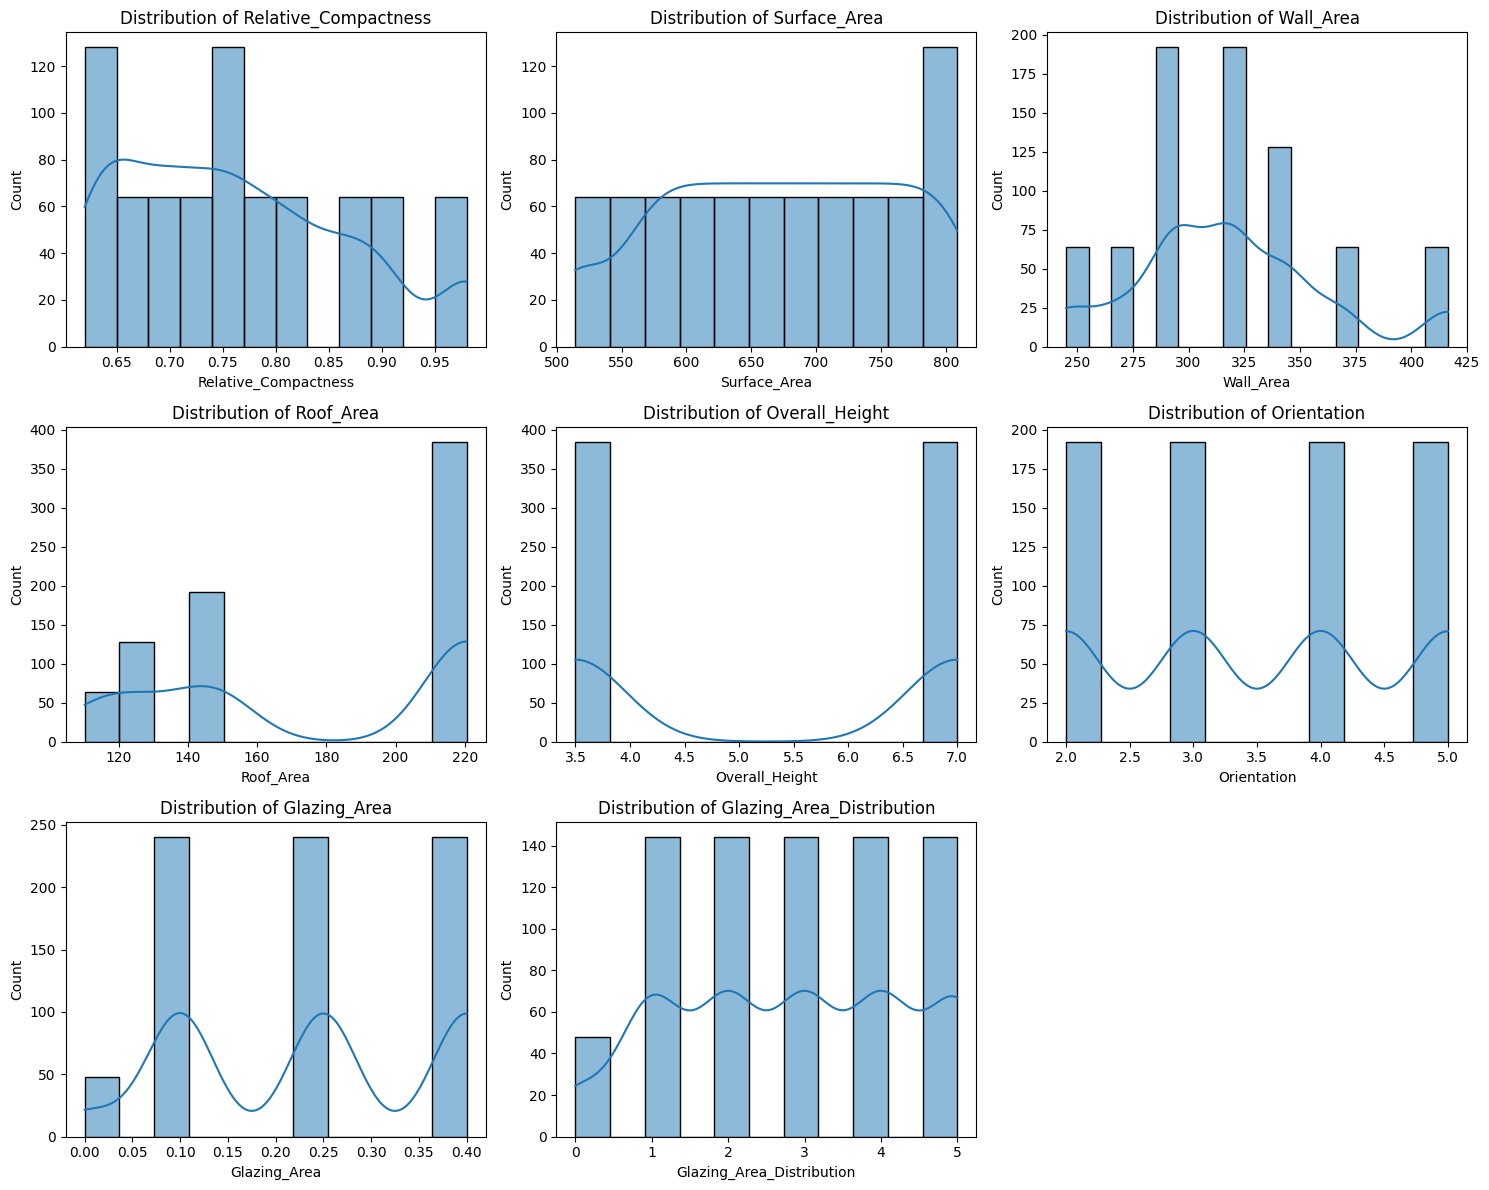

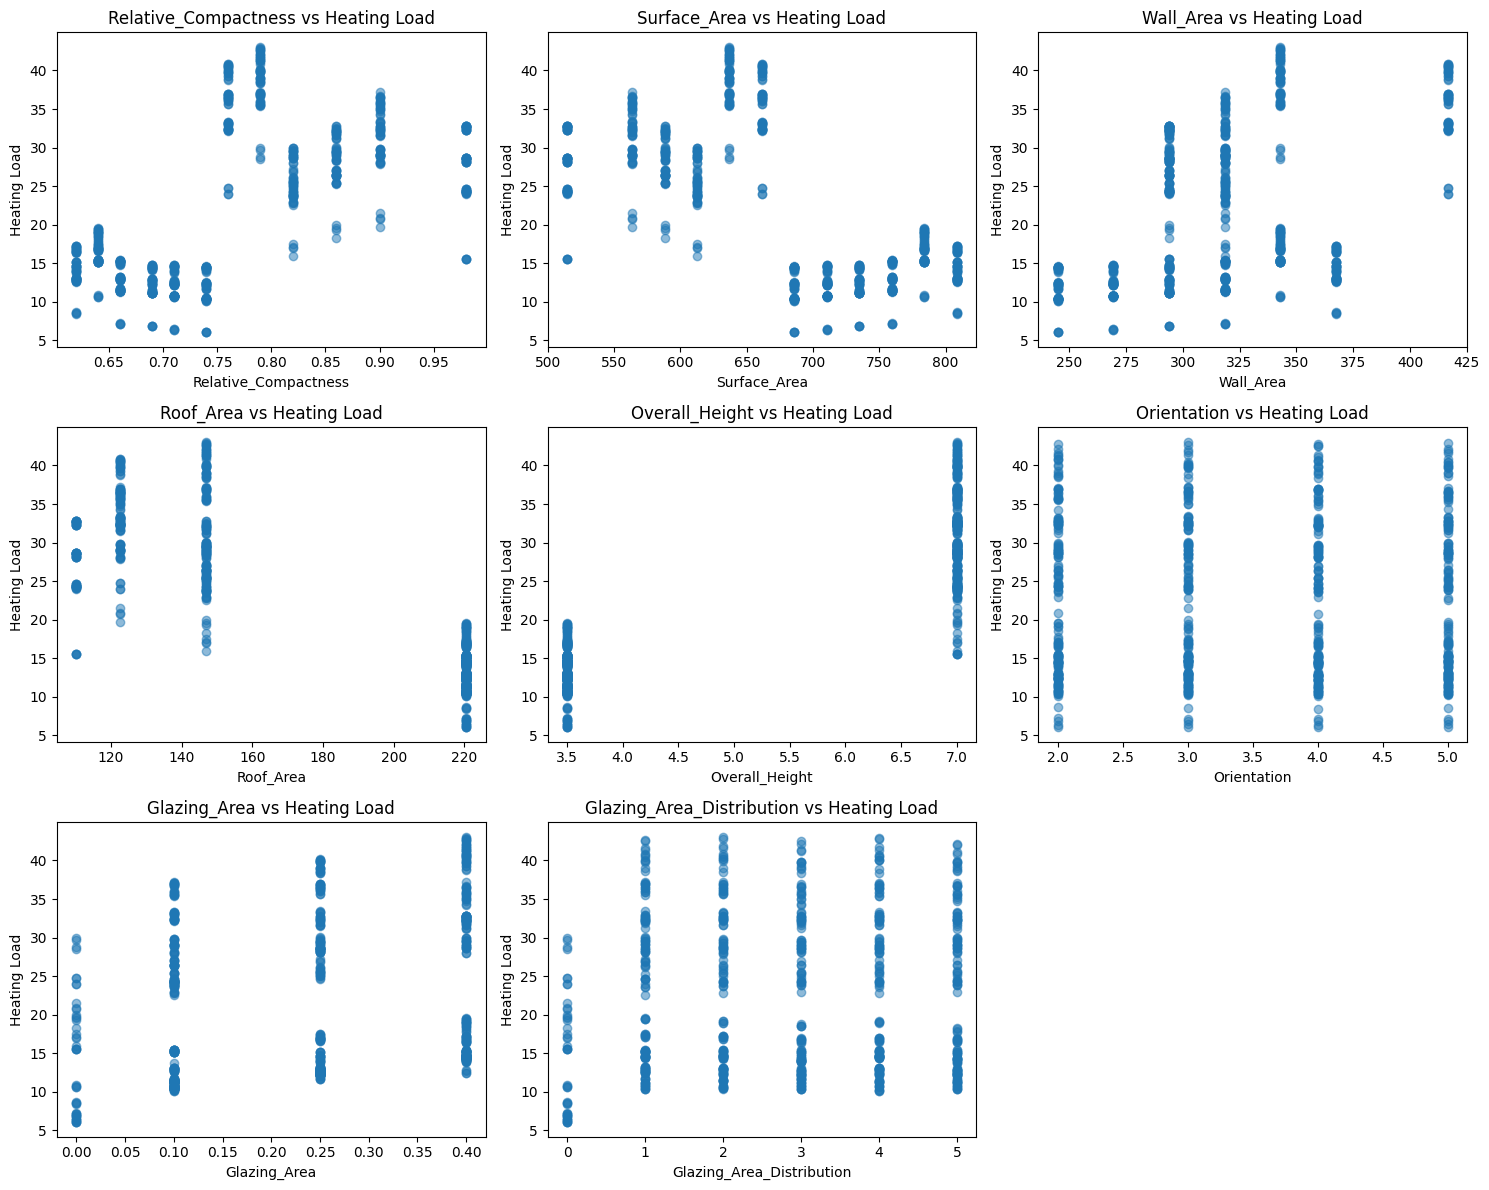

In [6]:

# Step 2: Visualize feature distributions
plt.figure(figsize=(15, 12))
for i, column in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Visualize relationship between features and target
plt.figure(figsize=(15, 12))
for i, column in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    plt.scatter(X[column], y_heating, alpha=0.5)
    plt.title(f'{column} vs Heating Load')
    plt.xlabel(column)
    plt.ylabel('Heating Load')
plt.tight_layout()
plt.show()



Columns in the dataset:
['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


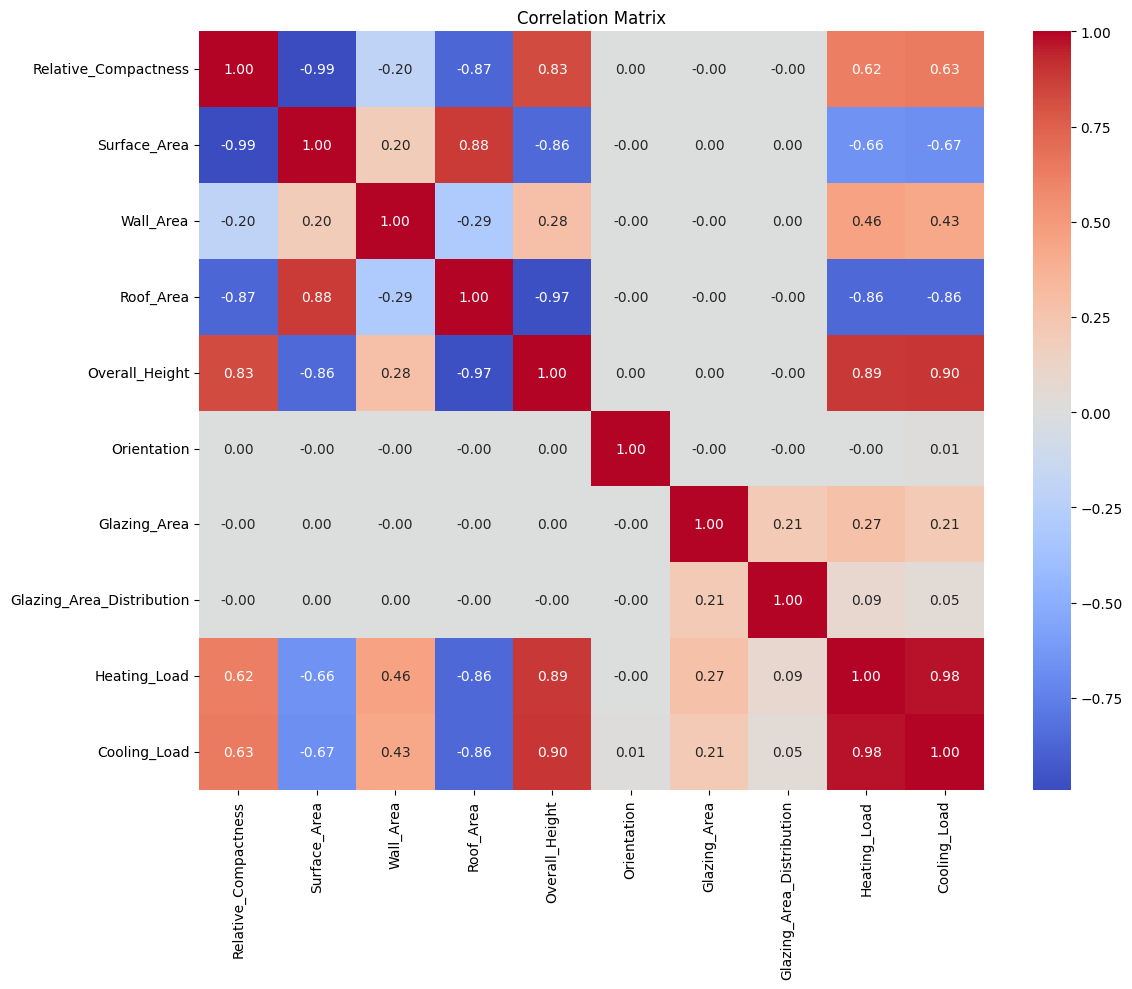

In [8]:
# Identify column names to distinguish features and targets
print("\nColumns in the dataset:")
print(data.columns.tolist())

# Assuming the column names based on typical energy efficiency datasets
# Note: We'll adjust this once we see the actual data
# Typically features might include wall area, roof area, orientation, glazing area, etc.
# And the target would be heating load

# Assuming last two columns are heating_load and cooling_load
X = data.iloc[:, :-2]  # All columns except the last two
y_heating = data.iloc[:, -2]  # Heating load (assumed second to last column)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [9]:

# Step 3 & 4: Train-test split and linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y_heating, test_size=0.2, random_state=42)

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Evaluate linear regression model
linear_train_r2 = r2_score(y_train, y_train_pred_linear)
linear_test_r2 = r2_score(y_test, y_test_pred_linear)
linear_train_mae = mean_absolute_error(y_train, y_train_pred_linear)
linear_test_mae = mean_absolute_error(y_test, y_test_pred_linear)
linear_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
linear_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

print("\nLinear Regression Performance:")
print(f"Training R² score: {linear_train_r2:.4f}")
print(f"Testing R² score: {linear_test_r2:.4f}")
print(f"Training MAE: {linear_train_mae:.4f}")
print(f"Testing MAE: {linear_test_mae:.4f}")
print(f"Training RMSE: {linear_train_rmse:.4f}")
print(f"Testing RMSE: {linear_test_rmse:.4f}")

# Plot residuals for linear model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_linear, y_train_pred_linear - y_train, alpha=0.5)
plt.title('Linear Model Residuals (Training Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_linear, y_test_pred_linear - y_test, alpha=0.5)
plt.title('Linear Model Residuals (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()



ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

X shape: (1296, 8)
y_heating shape: (1296,)

Summary statistics for Heating Load:
count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Heating_Load, dtype: float64


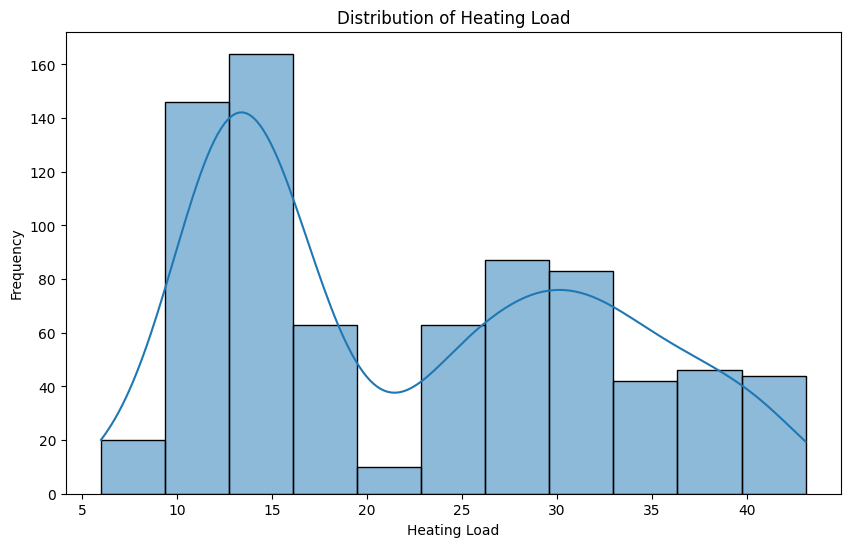

In [10]:
# Let's ensure our feature and target variables are properly defined
# Check if X and y_heating are already defined correctly
try:
    # Check if these variables exist and have data
    print("X shape:", X.shape)
    print("y_heating shape:", y_heating.shape)
except (NameError, AttributeError):
    # If not defined properly, redefine them
    print("Redefining X and y_heating...")
    # Make sure we're using the properly named columns
    if 'Heating_Load' in data.columns:
        X = data.drop(['Heating_Load', 'Cooling_Load'], axis=1)
        y_heating = data['Heating_Load']
    else:
        # Fallback if column renaming didn't happen
        X = data.iloc[:, :-2]  # All columns except the last two
        y_heating = data.iloc[:, -2]  # Heating load

# Display summary statistics for our target variable
print("\nSummary statistics for Heating Load:")
print(y_heating.describe())

# Create a simple plot to visualize the distribution of our target variable
plt.figure(figsize=(10, 6))
sns.histplot(y_heating, kde=True)
plt.title('Distribution of Heating Load')
plt.xlabel('Heating Load')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Step 5: Polynomial regression models
# We'll test different degrees
poly_results = []
max_degree = 3

plt.figure(figsize=(15, 10))
for degree in range(1, max_degree + 1):
    # Create polynomial features
    poly_model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )
    poly_model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred_poly = poly_model.predict(X_train)
    y_test_pred_poly = poly_model.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred_poly)
    test_r2 = r2_score(y_test, y_test_pred_poly)
    train_mae = mean_absolute_error(y_train, y_train_pred_poly)
    test_mae = mean_absolute_error(y_test, y_test_pred_poly)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
    
    poly_results.append({
        'degree': degree,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse
    })
    
    # Plot residuals
    plt.subplot(max_degree, 2, 2*degree-1)
    plt.scatter(y_train_pred_poly, y_train_pred_poly - y_train, alpha=0.5)
    plt.title(f'Polynomial (d={degree}) Residuals - Training')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    
    plt.subplot(max_degree, 2, 2*degree)
    plt.scatter(y_test_pred_poly, y_test_pred_poly - y_test, alpha=0.5)
    plt.title(f'Polynomial (d={degree}) Residuals - Testing')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')

plt.tight_layout()
plt.show()


In [ ]:

# Step 6: Compare polynomial models
results_df = pd.DataFrame(poly_results)
print("\nPolynomial Regression Results:")
print(results_df)

# Plot performance metrics for comparison
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(results_df['degree'], results_df['train_r2'], marker='o', label='Training R²')
plt.plot(results_df['degree'], results_df['test_r2'], marker='s', label='Testing R²')
plt.title('R² Score Comparison')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(results_df['degree'], results_df['train_rmse'], marker='o', label='Training RMSE')
plt.plot(results_df['degree'], results_df['test_rmse'], marker='s', label='Testing RMSE')
plt.title('RMSE Comparison')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

# Step 7: Select the best model based on test metrics
best_degree = results_df.loc[results_df['test_r2'].idxmax()]['degree']
print(f"\nBest polynomial degree based on test R² score: {best_degree}")

# Feature importance for the linear model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(linear_model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Linear Model)')
plt.tight_layout()
plt.show()

# Summary of findings
print("\nSummary of Model Evaluation:")
print(f"Linear Model - Test R²: {linear_test_r2:.4f}, Test RMSE: {linear_test_rmse:.4f}")
print(f"Best Polynomial Model (degree={best_degree}) - Test R²: {results_df.loc[results_df['degree'] == best_degree, 'test_r2'].values[0]:.4f}, " + 
      f"Test RMSE: {results_df.loc[results_df['degree'] == best_degree, 'test_rmse'].values[0]:.4f}")

# Check for overfitting
train_test_diff = results_df['train_r2'] - results_df['test_r2']
print("\nOverfitting Analysis (difference between train and test R²):")
print(pd.DataFrame({'Degree': results_df['degree'], 'Train-Test R² Difference': train_test_diff}))